In [1]:
import tester
import torch
torch.manual_seed(0)

In [2]:
tester.test_lr()

learning_rate train_loss train_accuracy test_loss test_accuracy
0.0001 0.6174776566609174 78.45777777777778 0.9226954457434741 67.06222222222222
0.0001 0.6264162249214235 77.95666666666666 0.9350852780044079 66.97111111111111
0.0001 0.6606460507340673 76.5988888888889 0.9667076356709003 66.35888888888888


KeyboardInterrupt: 

In [3]:
tester.test_dropout()

dropout_rate train_loss train_accuracy test_loss test_accuracy
0.25 0.5875262074037417 79.93777777777778 0.9008542041886937 68.21444444444444
0.25 0.5478698887722881 80.94444444444444 0.9151122597130862 68.64111111111112
0.25 0.5464487183657651 80.8788888888889 0.9183117235926065 68.52888888888889
0.5 0.8031105394152361 71.58222222222223 0.9497362321073358 66.18111111111111
0.5 0.7958422776667876 71.66666666666667 0.9474385472183878 65.94333333333333
0.5 0.7929265706131478 70.96111111111111 0.9737838493152098 65.32888888888888
0.75 1.092475755334197 60.86666666666667 1.1504131562330506 58.81333333333333
0.75 1.0629779309129699 61.672222222222224 1.1224017793482 59.471111111111114
0.75 1.085178539035077 60.45444444444445 1.146658058193597 58.32333333333333


I will try also version without dropout and manually merge with previous results in order to obtain more information

In [4]:
tester.test_dropout(dropout_rates=[0])

dropout_rate train_loss train_accuracy test_loss test_accuracy
Patience triggered. End of learning
0 0.29928731643275314 89.69444444444444 1.1639291749081828 66.70222222222222
Patience triggered. End of learning
0 0.42496791676115914 85.49 0.9880345648323948 67.52444444444444
Patience triggered. End of learning
0 0.2696568833573344 90.82888888888888 1.1221389286220074 67.28777777777778


In [5]:
tester.test_batchsizes()

batchsize train_loss train_accuracy test_loss test_accuracy
16 0.5675290021128124 80.52 0.9335802641104568 67.79333333333334
16 0.5734272649102741 80.2388888888889 0.9362504651600664 67.43777777777778
16 0.5257656986316045 81.82444444444444 0.9345763105560433 68.22888888888889
32 0.5024721701290105 82.11222222222223 0.9186296070163901 68.85222222222222
32 0.548463897559086 80.28333333333333 0.934563064778393 68.10777777777778
32 0.5552821232464829 80.05 0.9586149078201164 67.65333333333334
64 0.522189316380168 81.24333333333334 0.9526604099029844 68.23444444444445
64 0.5450186102671579 80.67111111111112 0.929693566127257 68.07
64 0.6205751167473932 77.95 0.9820650511167266 66.36


In [2]:
tester.test_w_decay()

weight_decay train_loss train_accuracy test_loss test_accuracy
0.001 0.5140938310437977 82.50555555555556 0.9002125093882735 68.84666666666666
0.001 0.4970578910445896 82.50555555555556 0.9413810914213007 68.83333333333333
0.001 0.5179573255705316 81.90666666666667 0.9546341472728685 67.99777777777778
0.01 0.5393315412864285 81.44888888888889 0.9025948572565209 68.61111111111111
0.01 0.5644909865939656 80.46222222222222 0.9270040023733269 67.59333333333333
0.01 0.5389638617343424 81.01444444444445 0.9471621345728636 67.64444444444445
0.1 0.8133587159489212 72.1211111111111 0.962058471685106 65.94444444444444
0.1 0.9032784887386563 69.11777777777777 1.0597494058310986 62.973333333333336
Patience triggered. End of learning
0.1 0.8560449705825681 70.70555555555555 1.0133582428097725 64.62666666666667


In [3]:
tester.test_w_decay(weight_decays=[0.0005])

weight_decay train_loss train_accuracy test_loss test_accuracy
0.0005 0.5064915597089193 82.43111111111111 0.9135463330894709 68.92222222222222
0.0005 0.5405149798333073 81.03444444444445 0.92550458826802 68.01666666666667
0.0005 0.5390307161516029 81.35222222222222 0.9188600676980886 68.35777777777778


Test of data augmentation 

In [2]:
tester.test_augmentation()

transformation train_loss train_accuracy test_loss test_accuracy
no-transform 0.5875262074037417 79.93777777777778 0.9008542041886937 68.21444444444444
no-transform 0.5478698887722881 80.94444444444444 0.9151122597130862 68.64111111111112
no-transform 0.5464487183657651 80.8788888888889 0.9183117235926065 68.52888888888889
flips 0.9573946897558924 65.49111111111111 1.0371837697245858 62.717777777777776
flips 0.9446547475947716 65.61111111111111 1.034061566333879 62.611111111111114
flips 0.9202998200218914 66.50888888888889 1.010271860117262 63.66555555555556
auto-augment 1.1237513981719818 59.772222222222226 1.0100966221229597 64.06444444444445
auto-augment 1.1096255787953846 61.39333333333333 1.0050860951569947 64.71555555555555
auto-augment 1.0343810709883978 62.906666666666666 0.9425679983740504 66.12222222222222
rand-augment 1.005288171526634 65.05777777777777 0.9508775702931664 66.54777777777778
rand-augment 0.992877999425909 64.82777777777778 0.9580857025628741 66.04777777777778


Test of different initialization for wide resnet and dense net with default parameters

In [ ]:
from implementation import train_model, evaluate
from loader import load_png_images
from torch.optim import AdamW
from torchvision import models
import torch.nn as nn
train_path="data/train"
valid_path="data/valid"
val_loader = load_png_images(valid_path, batch_size=1024, shuffle=False)[0] 
result = []
column_names = ["initialization","train_loss","train_accuracy","valid_loss","valid_accuracy"]
print(*column_names)
for initial in ["Wide_ResNet50_2_Weights.DEFAULT","Wide_ResNet50_2_Weights.IMAGENET1K_V1"]:
    for i in range(3):
        train_loader, num_classes = load_png_images(train_path, batch_size=32)
        model = models.wide_resnet50_2(weights=initial)
        model.fc = nn.Linear(model.fc.in_features, num_classes)   
        optimizer = AdamW(model.parameters())
        train_model(model, train_loader, val_loader, optimizer, epochs=10,printer = False)
        r_loss, r_acc = evaluate(model, train_loader)
        t_loss, t_acc = evaluate(model, val_loader)
        values = [initial,r_loss, r_acc,t_loss, t_acc]
        result.append(values)
        print(*values)

initialization train_loss train_accuracy valid_loss valid_accuracy
Wide_ResNet50_2_Weights.DEFAULT 0.2104648084767425 93.31444444444445 0.9433015358041633 70.28
Patience triggered. End of learning
Wide_ResNet50_2_Weights.DEFAULT 0.27375798444788396 91.06777777777778 0.894719716838815 71.61666666666666
Patience triggered. End of learning
Wide_ResNet50_2_Weights.DEFAULT 0.257330683830409 92.17111111111112 0.9053465920415792 70.86666666666666
Wide_ResNet50_2_Weights.IMAGENET1K_V1 0.7518086225864432 74.49777777777778 1.0348402610556646 64.28777777777778


In [5]:
from implementation import train_model, evaluate
from loader import load_png_images
from torch.optim import AdamW
from torchvision import models
import torch.nn as nn
train_path="data/train"
valid_path="data/valid"
val_loader = load_png_images(valid_path, batch_size=1024, shuffle=False)[0] 
result = []
column_names = ["initialization","train_loss","train_accuracy","valid_loss","valid_accuracy"]
print(*column_names)
for initial in ["DenseNet121_Weights.DEFAULT","DenseNet121_Weights.IMAGENET1K_V1"]:
    for i in range(3):
        train_loader, num_classes = load_png_images(train_path, batch_size=32)
        model = models.densenet121(weights=initial)
        model.fc = nn.Linear(model.classifier.in_features, num_classes)   
        optimizer = AdamW(model.parameters())
        train_model(model, train_loader, val_loader, optimizer, epochs=10,printer = False)
        r_loss, r_acc = evaluate(model, train_loader)
        t_loss, t_acc = evaluate(model, val_loader)
        values = [initial,r_loss, r_acc,t_loss, t_acc]
        result.append(values)
        print(*values)

initialization train_loss train_accuracy valid_loss valid_accuracy
Patience triggered. End of learning
DenseNet121_Weights.DEFAULT 1.573837946582595 58.30444444444444 1.587141359394247 57.08777777777778
DenseNet121_Weights.DEFAULT 0.8496227198506521 73.05222222222223 1.0276648202403025 66.58111111111111
Patience triggered. End of learning
DenseNet121_Weights.DEFAULT 4.555562995037827 62.48111111111111 4.425317401913079 60.327777777777776
Patience triggered. End of learning
DenseNet121_Weights.IMAGENET1K_V1 1.1019399262728997 66.01 1.1936945559626275 62.9
Patience triggered. End of learning
DenseNet121_Weights.IMAGENET1K_V1 14.448144044564197 64.06 16.57468796995553 61.623333333333335
Patience triggered. End of learning
DenseNet121_Weights.IMAGENET1K_V1 1.307279865554419 66.91111111111111 1.3900877172974022 63.72222222222222


Summarization of testing influence of parameters on model performance

In [3]:
results = tester.aggregate_csv_files()

In [6]:
results[0]

,train_loss_mean,train_loss_std,train_accuracy_mean,train_accuracy_std,test_loss_mean,test_loss_std,test_accuracy_mean,test_accuracy_std
transformation,,,,,,,,
auto-augment,1.089,0.048,61.357,1.568,0.986,0.038,64.967,1.052
flips,0.941,0.019,65.870,0.556,1.027,0.015,62.998,0.580
no-transform,0.561,0.023,80.587,0.563,0.911,0.009,68.461,0.221
rand-augment,0.987,0.022,65.267,0.573,0.945,0.017,66.609,0.594


In [7]:
results[1]

,train_loss_mean,train_loss_std,train_accuracy_mean,train_accuracy_std,test_loss_mean,test_loss_std,test_accuracy_mean,test_accuracy_std
batchsize,,,,,,,,
16,0.556,0.026,80.861,0.846,0.935,0.001,67.820,0.396
32,0.535,0.029,80.815,1.129,0.937,0.020,68.204,0.605
64,0.563,0.051,79.955,1.760,0.955,0.026,67.555,1.038


In [9]:
results[2]

,train_loss_mean,train_loss_std,train_accuracy_mean,train_accuracy_std,valid_loss_mean,valid_loss_std,valid_accuracy_mean,valid_accuracy_std
initialization,,,,,,,,
DenseNet121_Weights.DEFAULT,2.326,1.964,64.613,7.601,2.347,1.822,61.332,4.826
DenseNet121_Weights.IMAGENET1K_V1,7.775,9.437,65.035,1.379,8.884,10.876,62.262,0.903
DenseNet121_Weights.IMAGENET1K_V1,1.307,NaN,66.911,NaN,1.390,NaN,63.722,NaN


In [10]:
results[3]

,train_loss_mean,train_loss_std,train_accuracy_mean,train_accuracy_std,test_loss_mean,test_loss_std,test_accuracy_mean,test_accuracy_std
dropout_rate,,,,,,,,
0.00,0.331,0.082,88.671,2.813,1.091,0.092,67.171,0.423
0.25,0.561,0.023,80.587,0.563,0.911,0.009,68.461,0.221
0.50,0.797,0.005,71.403,0.385,0.957,0.015,65.818,0.440
0.75,1.080,0.015,60.998,0.619,1.140,0.015,58.869,0.576


In [11]:
results[4]

,train_loss_mean,train_loss_std,train_accuracy_mean,train_accuracy_std,test_loss_mean,test_loss_std,test_accuracy_mean,test_accuracy_std
learning_rate,,,,,,,,
0.0001,0.635,0.023,77.671,0.962,0.941,0.023,66.797,0.382
0.0010,0.533,0.011,81.257,0.486,0.937,0.007,67.932,0.301
0.0100,1.150,0.042,57.898,2.530,1.240,0.055,55.067,2.358


In [12]:
results[5]

,train_loss_mean,train_loss_std,train_accuracy_mean,train_accuracy_std,test_loss_mean,test_loss_std,test_accuracy_mean,test_accuracy_std
weight_decay,,,,,,,,
0.0005,0.529,0.019,81.606,0.732,0.919,0.006,68.432,0.457
0.0010,0.510,0.011,82.306,0.346,0.932,0.028,68.559,0.486
0.0100,0.548,0.015,80.975,0.495,0.926,0.022,67.950,0.573
0.1000,0.858,0.045,70.648,1.502,1.012,0.049,64.515,1.489


In [13]:
results[6]

,train_loss_mean,train_loss_std,train_accuracy_mean,train_accuracy_std,valid_loss_mean,valid_loss_std,valid_accuracy_mean,valid_accuracy_std
initialization,,,,,,,,
Wide_ResNet50_2_Weights.DEFAULT,0.247,0.033,92.184,1.123,0.914,0.026,70.921,0.67
Wide_ResNet50_2_Weights.IMAGENET1K_V1,0.752,NaN,74.498,NaN,1.035,NaN,64.288,NaN


Trying to find the best performing models of each type

In [2]:
from loader import load_png_images
from implementation import evaluate

test_loader = load_png_images("data/test",batch_size = 1024,shuffle = False)[0]
val_loader = load_png_images("data/valid",batch_size = 1024,shuffle = False)[0]

In [3]:
# tuple best_model, best_lr, best_w_decay
best_cnn = tester.find_best_cnn()
print("Learning_rate:", best_cnn[1], "Weight_decay:", best_cnn[2])

Patience triggered. End of learning
Patience triggered. End of learning
Learning_rate: 0.001 Weight_decay: 0.01


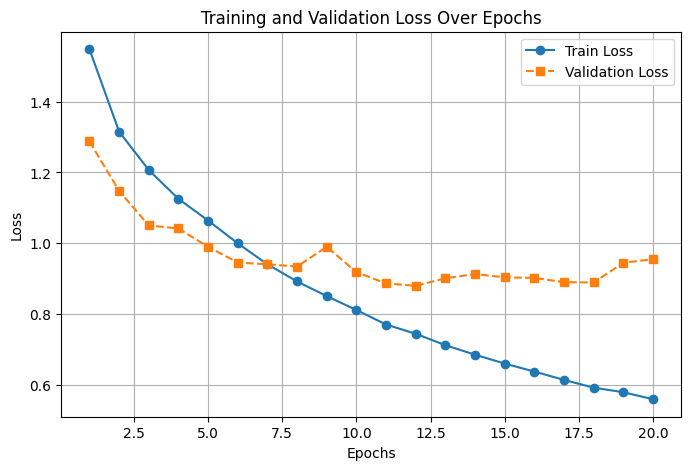

In [4]:
fully_trained_CNN = tester.plot_training("CNN",epochs=20, lr=best_cnn[1], w_decay=best_cnn[2])

In [5]:
val_loss, val_acc = evaluate(fully_trained_CNN,val_loader)
test_loss,test_acc = evaluate(fully_trained_CNN, test_loader)
print("Results for CNN")
print("Loss on validation dataset:",val_loss, "Loss on test dataset:", test_loss)
print("Accuracy on validation dataset:",val_acc, "Accuracy on test dataset:", test_acc)

Results for CNN
Loss on validation dataset: 0.9554844803430818 Loss on test dataset: 0.9689178883352063
Accuracy on validation dataset: 68.74333333333334 Accuracy on test dataset: 68.46777777777778


In [6]:
best_WideResNet = tester.find_best_type("WideResNet")
print("Learning_rate:", best_WideResNet[1], "Weight_decay:", best_WideResNet[2])

Patience triggered. End of learning
Patience triggered. End of learning
Patience triggered. End of learning
Patience triggered. End of learning
Learning_rate: 0.0001 Weight_decay: 0.1


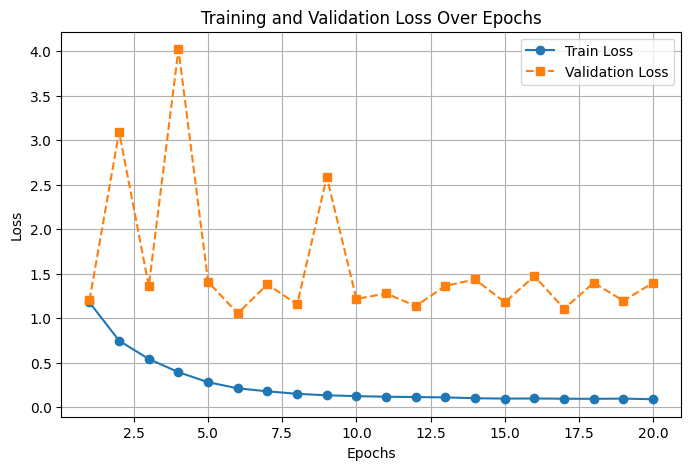

In [7]:
fully_trained_WideResNet = tester.plot_training("WideResNet",epochs=20, lr=best_WideResNet[1], w_decay=best_WideResNet[2])

In [8]:
val_loss, val_acc = evaluate(fully_trained_WideResNet,val_loader)
test_loss,test_acc = evaluate(fully_trained_WideResNet, test_loader)
print("Results for WideResNet")
print("Loss on validation dataset:",val_loss, "Loss on test dataset:", test_loss)
print("Accuracy on validation dataset:",val_acc, "Accuracy on test dataset:", test_acc)

Results for WideResNet
Loss on validation dataset: 1.3966632851145484 Loss on test dataset: 1.4110436182130466
Accuracy on validation dataset: 74.30444444444444 Accuracy on test dataset: 74.18111111111111


In [9]:
best_DenseNet = tester.find_best_type("DenseNet")
print("Learning_rate:", best_DenseNet[1], "Weight_decay:", best_DenseNet[2])

Patience triggered. End of learning
Patience triggered. End of learning
Patience triggered. End of learning
Patience triggered. End of learning
Learning_rate: 0.0001 Weight_decay: 0.1


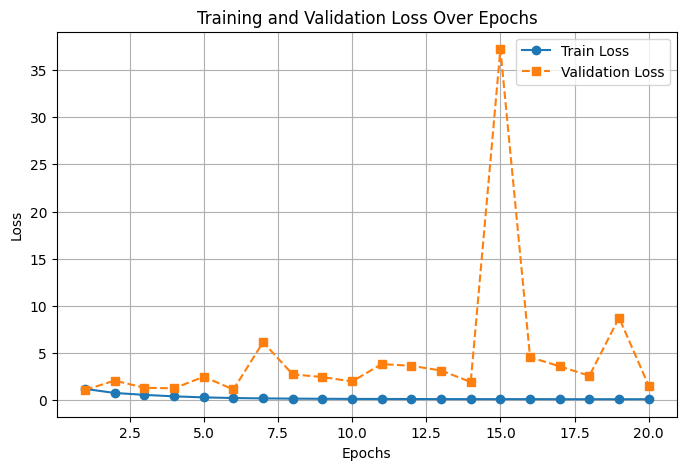

In [10]:
fully_trained_DenseNet = tester.plot_training("WideResNet",epochs=20, lr=best_DenseNet[1], w_decay=best_DenseNet[2])

In [11]:
val_loss, val_acc = evaluate(fully_trained_DenseNet,val_loader)
test_loss,test_acc = evaluate(fully_trained_DenseNet, test_loader)
print("Results for DenseNet")
print("Loss on validation dataset:",val_loss, "Loss on test dataset:", test_loss)
print("Accuracy on validation dataset:",val_acc, "Accuracy on test dataset:", test_acc)

Results for DenseNet
Loss on validation dataset: 1.5151543515649708 Loss on test dataset: 1.5243326970799402
Accuracy on validation dataset: 74.01 Accuracy on test dataset: 74.15
